In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import statsmodels.api as sm

In [2]:
data=pd.read_excel('C:\pbl_movie.xlsx',header=0)

In [3]:
X=data[['주연 top50 출연 여부','배급사','국적','전국 스크린수','경쟁작',
       '가족','공연','공포(호러)','기타','다큐멘터리','드라마','멜로/로맨스','뮤지컬',
       '미스터리','범죄','사극','스릴러','액션','어드벤처','전쟁',
       '코미디','판타지','SF','top영화감독 여부','네티즌 평점','러닝타임',
       '연작','원작','12세관람가','15세관람가','19세관람가',
       '연휴기간 상영여부']]
y=data[['전국 관객수']]
y1=data[['전국 관객수 분류']]

In [4]:
X

,주연 top50 출연 여부,배급사,국적,전국 스크린수,경쟁작,가족,공연,공포(호러),기타,다큐멘터리,...,SF,top영화감독 여부,네티즌 평점,러닝타임,연작,원작,12세관람가,15세관람가,19세관람가,연휴기간 상영여부
0,1,1,1,1587,3,0,0,0,0,0,...,0,1,8.44,128,0,0,0,1,0,1
1,1,1,1,1978,3,0,0,0,0,0,...,0,1,8.50,111,0,0,0,1,0,1
2,1,1,1,1912,4,0,0,0,0,0,...,0,1,7.83,139,0,1,1,0,0,1
3,1,1,1,966,5,0,0,0,0,0,...,0,0,9.01,126,0,0,1,0,0,1
4,1,1,0,2835,1,0,0,0,0,0,...,0,1,9.38,181,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,1,374,2,0,0,0,0,0,...,0,0,6.47,94,0,0,0,1,0,0
996,1,1,0,297,3,0,0,0,0,0,...,0,0,7.61,87,0,0,0,0,1,0
997,0,1,0,217,3,0,0,0,0,0,...,0,0,8.34,103,0,0,0,1,0,0
998,0,0,0,661,3,0,0,0,0,0,...,0,0,6.10,128,0,0,1,0,0,0


In [5]:
#데이터들의 상관계수
corr=data.corr()
corr[["전국 관객수"]]

,전국 관객수
순번,-0.760445
주연 top50 출연 여부,0.308597
배급사,0.210274
수상내역,0.410716
국적,0.147828
전국 스크린수,0.618742
전국 매출액,0.995747
전국 관객수 분류,0.878861
전국 관객수,1.000000
경쟁작,-0.000585


In [20]:
# 상관관계 0.2 이상 변수: '주연 top50 출연 여부','배급사', '전국 스크린수','러닝타임', '네티즌 평점',
#        'top영화감독 여부','연휴기간 상영여부 

In [23]:
#단계별 선택법(stepwise selection)으로 변수 선정하기
variables = X.columns.tolist() #설명변수 리스트

selected_variables = [] #선택된 변수들 리스트
sl_enter=0.05 #변수 추가시 유의수준
sl_remove=0.05 #변수 제거시 유의수준

sv_per_step = [] #각 스텝별로 선택된 변수들
adjusted_r_squared = [] #각 스텝별 수정된 결정계수
steps=[] #스텝
step=0
while len(variables) >0:
    remainder = list(set(variables)- set(selected_variables))
    pval=pd.Series(index=remainder) #변수의 p-value리스트
    #기존에 포함된 변수에 새로운 변수 하나씩 돌아가면서 추가해
    #선형 모형에 적합시켜본다
    for col in remainder:
        newX= X[selected_variables+[col]] 
        newX= sm.add_constant(newX)
        model=sm.OLS(y,newX).fit()
        pval[col] = model.pvalues[col] #p-value리스트에 p-value값 넣기
    
    min_pval = pval.min()
    if min_pval < sl_enter: # 최소 p-value값이 유의수준 기준보다 작으면 포함
        selected_variables.append(pval.idxmin())
        #선택된 변수들중에서 어떤 변수를 제거할지 고른다
        while len(selected_variables) >0:
            selected_X= X[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval= sm.OLS(y,selected_X).fit().pvalues[1:] #절편의 p-value는 뺀다
            max_pval=selected_pval.max()
            if max_pval>=sl_remove: #최대 p-value값이 기준 유의수준보다 크거나 같으면 제외
                remove_variable= selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
            
        step+=1
        steps.append(step)
        adj_r_squared= sm.OLS(y,sm.add_constant(X[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

<ipython-input-23-1f1306b535e6>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval=pd.Series(index=remainder) #변수의 p-value리스트
<ipython-input-23-1f1306b535e6>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval=pd.Series(index=remainder) #변수의 p-value리스트
<ipython-input-23-1f1306b535e6>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval=pd.Series(index=remainder) #변수의 p-value리스트
<ipython-input-23-1f1306b535e6>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval=pd.Series(index=remainder) #변수의 p-v

In [24]:
selected_variables

['전국 스크린수',
 'top영화감독 여부',
 '네티즌 평점',
 '연휴기간 상영여부',
 '주연 top50 출연 여부',
 '국적',
 '15세관람가']

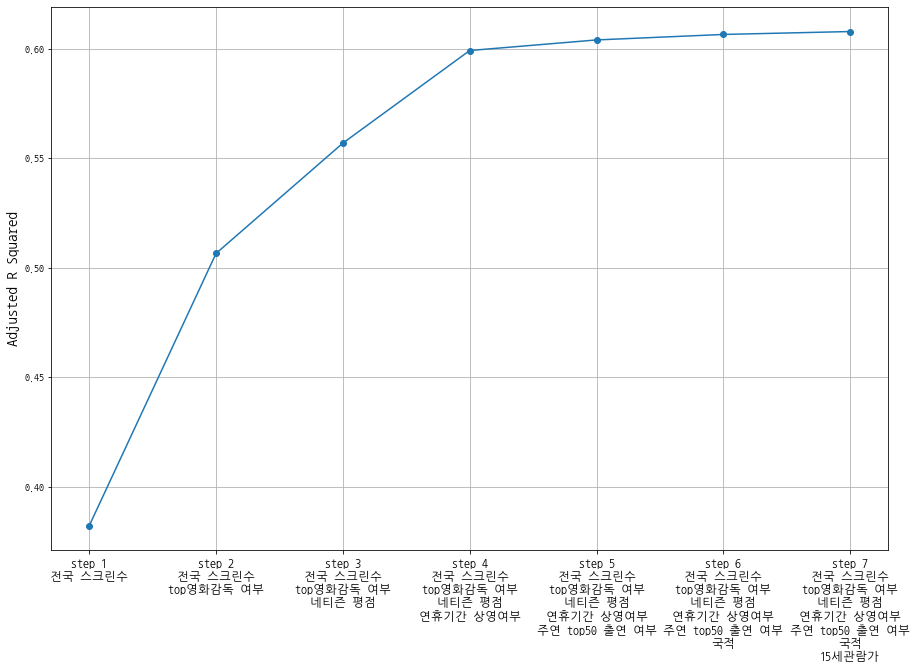

In [25]:
#단계별 모형 적합도 그래프
fig=plt.figure(figsize=(15,10))
fig.set_facecolor('white')

font_path="C:\\Windows\\Fonts\\NanumGothicCoding.ttf"
font= font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
font_size=15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)],fontsize=12)
plt.plot(steps, adjusted_r_squared, marker='o')

plt.ylabel('Adjusted R Squared', fontsize=font_size)
plt.grid(True)
plt.show()